### <a id='1.0'> 1.0 Linear regression, Plots and Coefplot  </a> 

In [51]:
import pandas as pd
import numpy as np
import math

#plots library
import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

#### Pasty documentation

https://patsy.readthedocs.io/en/latest/quickstart.html

In [52]:
# Cargamos la base de datos 

data = pd.read_stata("../data/Pesos/peso.dta")

In [53]:
data

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109.0,12.0,12.0,1.0,1.0,1.0,0.0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133.0,6.0,12.0,2.0,1.0,0.0,0.0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129.0,NaN,12.0,2.0,0.0,0.0,0.0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126.0,12.0,12.0,2.0,1.0,0.0,0.0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134.0,14.0,12.0,2.0,1.0,1.0,0.0,4.897840,8.3750,0.0,3.314186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110.0,12.0,12.0,4.0,1.0,1.0,0.0,4.700480,6.8750,0.0,3.314186
1384,5.5,30.0,138.300003,146.0,NaN,16.0,2.0,1.0,1.0,0.0,4.983607,9.1250,0.0,1.704748
1385,65.0,8.0,118.599998,135.0,18.0,16.0,2.0,0.0,1.0,0.0,4.905275,8.4375,0.0,4.174387
1386,27.5,8.0,118.599998,118.0,NaN,14.0,2.0,0.0,1.0,0.0,4.770685,7.3750,0.0,3.314186


### <a id='1.1'> 1.1 Histogram and Distribution </a> 

In [54]:
# Dummy variable 

data['Dummy'] =  np.where(data['cigs'] > 0 , 1, 0)

#Correción si ubiera missings en cigs

data['Dummy'].mask(data['cigs'].isna(), np.nan, inplace=True)

# si data['cigs'] es missing en alguna fila, entonces en coloca na en esa observación para la columna Dummy

Text(0.5, 0, '')

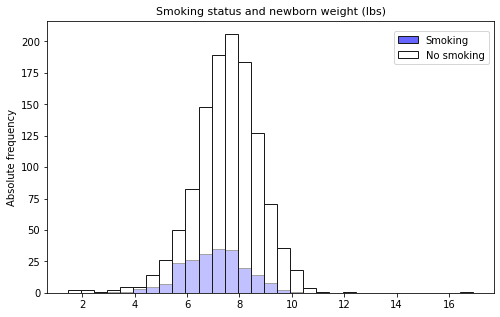

In [55]:
fig = plt.subplots(figsize=(8,5))

# Histograma de frecuencia absoluta 

sns.histplot(data = data,  # base de datos
            x = 'bwghtlbs',
            alpha = 0.6,  # grado de transperencia
            hue = 'Dummy', # se crea dos histograma para cada valor de la Dummy (1,0)
            palette=['white','blue'], # color para cada histograma
            edgecolor="0.1",  # color del borde de cada barra
            linewidth=1, # ancho del borde de cada barra
             binwidth=0.5 # ancho de cada barra de 0.5
            )

plt.legend(labels=['Smoking','No smoking'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98)) # Leyenda
plt.title('Smoking status and newborn weight (lbs)', size=11)
plt.ylabel('Absolute frequency')
plt.xlabel('')

Text(0.5, 0, '')

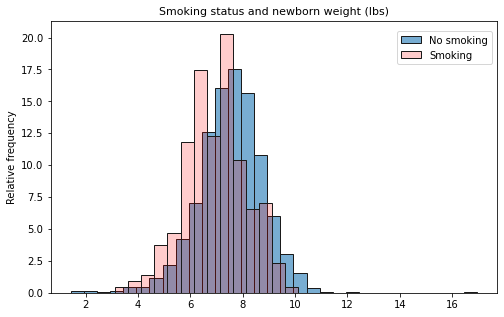

In [56]:
# Histograma de frecuencia relativa

fig = plt.subplots(figsize=(8,5))

# El caso de madres no fumadoras

sns.histplot(data = data[data.Dummy == 0],
            x = 'bwghtlbs',
            alpha = 0.6,
            edgecolor="0.1",
            linewidth=1,
             stat = "percent",  # percent indica que se grafica un histograma de frecuencia relativa
             binwidth=0.5
            )

# El caso de madres fumadoras

sns.histplot(data = data[data.Dummy == 1],
            x = 'bwghtlbs',
            alpha = 0.2,
            edgecolor="0.1",
            linewidth=1,
             stat = "percent",
             binwidth=0.5,
             color = 'red'  # color 
            )

plt.legend(labels=['No smoking','Smoking'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98))
plt.title('Smoking status and newborn weight (lbs)', size=11)
plt.ylabel('Relative frequency')
plt.xlabel('')

# Histograma ligeramente hacia la izquierda

Text(0.5, 0, '')

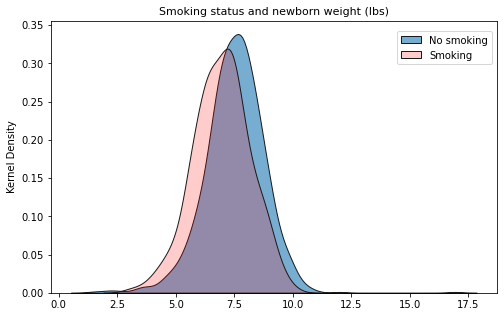

In [57]:
# Gráfico de densidad 

fig = plt.subplots(figsize=(8,5))

sns.kdeplot(data = data[data.Dummy == 0],
            x = 'bwghtlbs',
            alpha = 0.6,
            edgecolor="0.1",
            linewidth=1,
             fill=True
            )

sns.kdeplot(data = data[data.Dummy == 1],
            x = 'bwghtlbs',
            alpha = 0.2,
            edgecolor="0.1",
            linewidth=1,
            fill=True,
             color = 'red'
            )

plt.legend(labels=['No smoking','Smoking'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98))
plt.title('Smoking status and newborn weight (lbs)', size=11)
plt.ylabel('Kernel Density')
plt.xlabel('')

### <a id='1.2'> 1.2 Linear Regression </a> 

### Variables

- lbwght: logaritmo del peso del bebé en libras
- motheduc: educación de la madre
- lfaminc: logaritmo del imgreso familair real mensual
- white: Dummy igual a 1 si la madre es caucácica

In [58]:
# First Model

model1 = smf.ols('lbwght ~ Dummy', data).fit(cov_type = 'HC1').summary2().tables[1]
model1_coef = model1.iloc[1,0] # coeficiente
model1_coef_se = model1.iloc[1,1] # error estandar
model1_lower = model1.iloc[1,4] # limite inferior del itnervalo de confianza
model1_upper = model1.iloc[1,5] # limite superior del intervalo de confianza

In [59]:
model1

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,4.771778,0.005531,862.764316,0.000000e+00,4.760938,4.782619
Dummy,-0.076913,0.013751,-5.593088,2.230664e-08,-0.103865,-0.049960


In [60]:
# Second Model

model2 = smf.ols('lbwght ~ Dummy + motheduc', data).fit(cov_type = 'HC1').summary2().tables[1]
model2_coef = model2.iloc[1,0]
model2_coef_se = model2.iloc[1,1]

model2_lower = model2.iloc[1,4]
model2_upper = model2.iloc[1,5]


# Third Model

model3 = smf.ols('lbwght ~ Dummy + motheduc + lfaminc + white + Dummy:(motheduc + lfaminc + white)', data).fit(cov_type = 'HC1').summary2().tables[1]

model3_coef = model3.iloc[1,0]
model3_coef_se = model3.iloc[1,1]

model3_lower = model3.iloc[1,4]
model3_upper = model3.iloc[1,5]

In [61]:
## Intercación entre variables

"Dummy:(motheduc + lfaminc + white) = Dummy*motheduc + Dummy*lfaminc +  Dummy*white"

'Dummy:(motheduc + lfaminc + white) = Dummy*motheduc + Dummy*lfaminc +  Dummy*white'

In [62]:
y, model_X = patsy.dmatrices(" lbwght ~ -1 + Dummy:(motheduc + lfaminc + white)", data, return_type='dataframe')

# -1 para retirar el intercepto que por default se incluye
# patsy.dmatrices genera dos resulados: la variable dependiente , las explicativas o independiente

In [63]:
model_X # hemos creado la base de datos a partir de una formula de regresión

# Es util pues hay modelos que no admiten formulas sino solo matrices
# Permite crear nuevas variable de manera rápida

,Dummy:motheduc,Dummy:lfaminc,Dummy:white
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,-0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1383,0.0,0.0,0.0
1384,0.0,0.0,0.0
1385,0.0,0.0,0.0
1386,0.0,0.0,0.0


In [64]:
# Creamos una Dataframe con el coeficiente estimado, error estadnar robusta e intervalo de confianza
# Creamos una matriz 3x4

table = np.zeros( ( 3, 4 ) )

table[0,0] = model1_coef
table[0,1] = model1_coef_se 
table[0,2] = model1_lower
table[0,3] = model1_upper 

table[1,0] = model2_coef
table[1,1] = model2_coef_se  
table[1,2] = model2_lower
table[1,3] = model2_upper 

table[2,0] = model3_coef
table[2,1] = model3_coef_se  
table[2,2] = model3_lower
table[2,3] = model3_upper 


# Convertimos la matrix a DataFrame. Se asigna los nombre de als columnas 

table_pandas = pd.DataFrame( table, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])

# Nombre de los indices 

table_pandas.index = [ "OLS baseline","OLS with controls", "OLS interactive model"]

table_pandas.reset_index(inplace = True) # Se pasa de índices a 
table_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table_pandas.round(8)

,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,OLS baseline,-0.076913,0.013751,-0.103865,-0.049960
1,OLS with controls,-0.073028,0.014156,-0.100773,-0.045284
2,OLS interactive model,0.012595,0.089136,-0.162109,0.187299


In [77]:
print(table_pandas.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &                  Model &  Estimate &  Std. Error &  Lower\_bound &  Upper\_bound \\
\midrule
0 &           OLS baseline & -0.076913 &    0.013751 &    -0.103865 &    -0.049960 \\
1 &      OLS with controls & -0.073028 &    0.014156 &    -0.100773 &    -0.045284 \\
2 &  OLS interactive model &  0.012595 &    0.089136 &    -0.162109 &     0.187299 \\
\bottomrule
\end{tabular}



C:\Users\Roberto\AppData\Local\Temp\ipykernel_492\2061269471.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_pandas.to_latex())


### <a id='1.3'> 1.3 Coefplot </a> 

Text(0.5, 1.0, 'Smoking Coefficient (95% CI)')

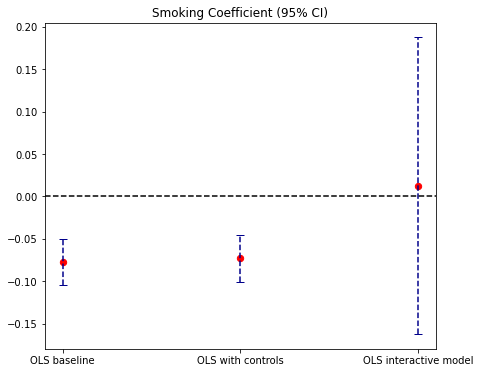

In [73]:
fig, ax = plt.subplots(figsize=(7, 6))  # objeto figura, ejex, tamaño de imagen 

ax.scatter(x=table_pandas['Model'], # eje x
         marker='o', s=40,   # marker o
         y=table_pandas['Estimate'], color = "red")  # dato en el eje y , color rojo 

eb1 = plt.errorbar(x=table_pandas['Model'], y=table_pandas['Estimate'],
            yerr = 0.5*(table_pandas['Upper_bound']- table_pandas['Lower_bound']), # longitud del intervalo de confianza
            color = 'darkblue', ls='', capsize = 4)

plt.axhline(y=0, color = 'black').set_linestyle('--') # linea horizontal en "y" igual a cero

eb1[-1][0].set_linestyle('--') # estilo de lineas punteadas

# Set title & labels

plt.title('Smoking Coefficient (95% CI)',fontsize=12)


# plt.errorbar: error bar para el intervalo de confianza